In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from db_info import password
import numpy as np
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
%matplotlib inline

In [2]:
from sqlalchemy import create_engine

# Postgres username, password, and database name
POSTGRES_ADDRESS = 'localhost'
POSTGRES_PORT = '5432'
POSTGRES_USERNAME = 'postgres' 
POSTGRES_PASSWORD = password #Create your own .py file and store your password (place into .gitignore)
POSTGRES_DBNAME = 'sql_challenge4' #Change it to the your database name

# A long string that contains the necessary Postgres login information
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'
                .format(username=POSTGRES_USERNAME,
                        password=POSTGRES_PASSWORD,
                        ipaddress=POSTGRES_ADDRESS,
                        port=POSTGRES_PORT,
                        dbname=POSTGRES_DBNAME))

# Create the connection
cnx = create_engine(postgres_str)

In [46]:
# Query to obtain data on salaries of employees
#No null values as NOT NULL constraint was placed in database
salaries = pd.read_sql_query('''SELECT * FROM salaries;''', cnx)

salaries


,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


In [47]:
#Check to see the kind of data we are dealing with
salaries.describe()

,salary
count,300024.000000
mean,52970.732451
std,14301.478491
min,40000.000000
25%,40000.000000
50%,48681.000000
75%,61758.000000
max,129492.000000


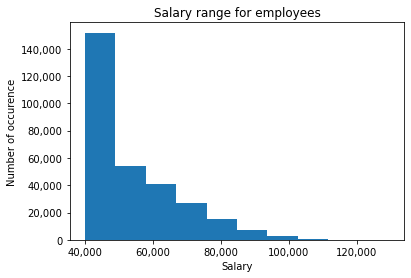

In [43]:
#Create a histogram to visualise the most common salary ranges for employees.
fig, ax = plt.subplots()
plt.hist(salaries.salary)

#Format the graph to show the title, x-label name, y-label name, x-ticks and format x-ticks.
plt.title('Salary range for employees')
plt.xlabel('Salary')
plt.xticks(np.arange(40000, 130000, step=20000))
plt.ylabel('Number of occurence')
plt.grid(False)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))


In [49]:
#Query to obtain data on salary and title
#No null values as NOT NULL constraint was placed in database
salaries_title = pd.read_sql_query('''SELECT e.emp_no, e.last_name, e.first_name, e.sex, s.salary, t.title 
FROM employees e 
LEFT JOIN salaries s  
ON e.emp_no = s.emp_no 
LEFT JOIN titles t 
ON e.emp_title_id = t.title_id;''', cnx)

In [50]:
#Group salary by title
groupby_salaries_title = salaries_title.groupby(['title'])
avg_sal_title = groupby_salaries_title.mean().sort_values(by="salary")

#Change index from title to default (i.e. 0,1,2,etc)
avg_sal_title.reset_index(inplace = True)

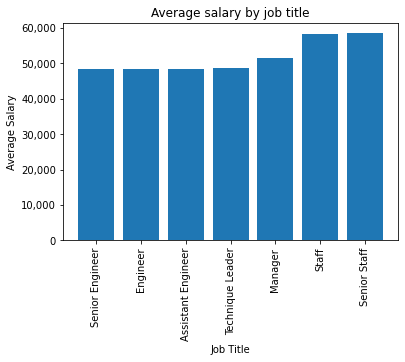

In [51]:
# Create a bar chart of average salary by title
fig, ax = plt.subplots()
x_axis = avg_sal_title['title']
y_axis = avg_sal_title['salary']
plt.bar(x_axis,y_axis, align = 'center')

#Added graph title, x-label name, y-label name, rotated x-label and format y-ticks to be more readable.
plt.title('Average salary by job title')
plt.xlabel('Job Title')
plt.xticks(rotation=90)
plt.ylabel('Average Salary')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

